#Install Libraries

In [ ]:
#NLTK libraries to remove stopwords, for lemmatization and tokenizing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [ ]:
from tabulate import tabulate

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
from scipy import stats

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import gensim
from gensim.models import Word2Vec

#Load Data

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Loading the training set
train_read=pd.read_csv("/content/gdrive/MyDrive/EmoInt/anger/train_anger.txt",delimiter = "\t",names=["Index", "Tweet", "Emotion", "Emotion Intensity"])

In [ ]:
#Loading the development set
dev_read=pd.read_csv("/content/gdrive/MyDrive/EmoInt/anger/dev_anger_intensity.txt",delimiter = "\t",names=["Index", "Tweet", "Emotion", "Emotion Intensity"])

In [ ]:
#Loading the test set
test_read=pd.read_csv("/content/gdrive/MyDrive/EmoInt/anger/test_anger_intensity.txt",delimiter = "\t",names=["Index", "Tweet", "Emotion", "Emotion Intensity"])

In [ ]:
#Display the training data for anger 
train_read.head()

,Index,Tweet,Emotion,Emotion Intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
#Display the development data for anger 
dev_read.head()

,Index,Tweet,Emotion,Emotion Intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [ ]:
#Display the test data for anger 
test_read.head()

,Index,Tweet,Emotion,Emotion Intensity
0,10941,At the point today where if someone says somet...,anger,NONE
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,NONE
2,10943,This game has pissed me off more than any othe...,anger,NONE
3,10944,@spamvicious I've just found out it's Candice ...,anger,NONE
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,NONE


#Data Analysis

In [ ]:
#Length of training set
train_read.shape[0]

857

In [ ]:
#Length of development set
dev_read.shape[0]

84

In [ ]:
#Length of test set
test_read.shape[0]

760

In [ ]:
#Data type of each column in training set
train_read.dtypes

Index                  int64
Tweet                 object
Emotion               object
Emotion Intensity    float64
dtype: object

In [ ]:
#Converting tweet and emotion from object to string type
train_read.astype({'Tweet':'string', 'Emotion':'string'}).dtypes

Index                  int64
Tweet                 string
Emotion               string
Emotion Intensity    float64
dtype: object

In [ ]:
#Describe the dataset
train_read.describe()

,Index,Emotion Intensity
count,857.000000,857.000000
mean,10428.000000,0.496475
std,247.538886,0.169169
min,10000.000000,0.067000
25%,10214.000000,0.375000
50%,10428.000000,0.479000
75%,10642.000000,0.604000
max,10856.000000,0.938000


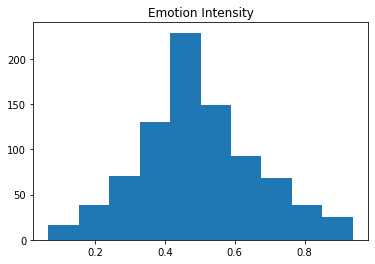

In [ ]:
hist = train_read.hist(column='Emotion Intensity',grid=False)

#Text Cleaning

## Converting to Lower Case

In [ ]:
train_read['Cleaned Text']=train_read['Tweet'].str.lower()

In [ ]:
train_read.head()

,Index,Tweet,Emotion,Emotion Intensity,Cleaned Text
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,how the fu*k! who the heck! moved my fridge!.....
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,so my indian uber driver just called someone t...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,@dpd_uk i asked for my parcel to be delivered ...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,so ef whichever butt wipe pulled the fire alar...
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,don't join @btcare they put the phone down on ...


In [ ]:
dev_read['Cleaned Text']=dev_read['Tweet'].str.lower()

In [ ]:
test_read['Cleaned Text']=test_read['Tweet'].str.lower()

## Removing Numbers

In [ ]:
train_read['Tweet'][33]

"Since the 'update' my @iPhone loses power nearly 40% faster.  #furious"

In [ ]:
train_read['Cleaned Text'].replace('\d+', '', regex=True, inplace=True)

In [ ]:
train_read['Cleaned Text'][33]

"since the 'update' my @iphone loses power nearly % faster.  #furious"

In [ ]:
dev_read['Cleaned Text'].replace('\d+', '', regex=True, inplace=True)

In [ ]:
test_read['Cleaned Text'].replace('\d+', '', regex=True, inplace=True)

## Removing URLs

In [ ]:
train_read['Cleaned Text'] = train_read['Cleaned Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

In [ ]:
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

In [ ]:
test_read['Cleaned Text'] = test_read['Cleaned Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

## Separating Hashtags

In [ ]:
train_read['Tweet'][3]

'so ef whichever butt wipe pulled the fire alarm in davis bc I was sound asleep #pissed #angry #upset #tired #sad #tired #hangry ######'

In [ ]:
def separating_hashtags(text):
  return re.findall("#([a-zA-Z0-9_]{1,50})", text)

In [ ]:
def removing_hashtags(text):
  return re.sub("#[A-Za-z0-9_]+","", text)

In [ ]:
train_read['Hashtags'] = train_read['Tweet'].apply(separating_hashtags)
train_read['Cleaned Text'] = train_read['Cleaned Text'].apply(removing_hashtags)

In [ ]:
train_read['Cleaned Text'][3]

'so ef whichever butt wipe pulled the fire alarm in davis bc i was sound asleep        ######'

In [ ]:
train_read['Hashtags'][3]

['pissed', 'angry', 'upset', 'tired', 'sad', 'tired', 'hangry']

In [ ]:
dev_read['Hashtags'] = dev_read['Tweet'].apply(separating_hashtags)
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].apply(removing_hashtags)

In [ ]:
test_read['Hashtags'] = test_read['Tweet'].apply(separating_hashtags)
test_read['Cleaned Text'] = test_read['Cleaned Text'].apply(removing_hashtags)

## Removing UserHandles




In [ ]:
train_read['Tweet'][16]

"@ArizonaCoyotes not to mention the GRA guy stops me but let's the 2 ppl in front of me go. WTF. My blood is boiling."

In [ ]:
def removeUserHandles(text):
  return re.sub("@[A-Za-z0-9_]+","", text)

In [ ]:
train_read['Cleaned Text'] = train_read['Cleaned Text'].apply(removeUserHandles)

In [ ]:
train_read['Cleaned Text'][16]

" not to mention the gra guy stops me but let's the  ppl in front of me go. wtf. my blood is boiling."

In [ ]:
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].apply(removeUserHandles)

In [ ]:
test_read['Cleaned Text'] = test_read['Cleaned Text'].apply(removeUserHandles)

##Removing Special Characters

In [ ]:
train_read['Tweet'][27]

'Bloody parking ticket ðŸ˜’ðŸ’¸ #fuming'

In [ ]:
def remove_specialCharacters(text):
  return re.sub(r"[^\*a-zA-Z0-9]"," ",text)

In [ ]:
train_read['Cleaned Text'] = train_read['Cleaned Text'].apply(remove_specialCharacters)

In [ ]:
train_read['Cleaned Text'][27]

'bloody parking ticket          '

In [ ]:
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].apply(remove_specialCharacters)

In [ ]:
test_read['Cleaned Text'] = test_read['Cleaned Text'].apply(remove_specialCharacters)

## Tokenizing

In [ ]:
def tokenize(text):
  return word_tokenize(text)

In [ ]:
train_read['Cleaned Text'] = train_read['Cleaned Text'].apply(tokenize)

In [ ]:
train_read.head()

,Index,Tweet,Emotion,Emotion Intensity,Cleaned Text,Hashtags
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,"[how, the, fu*k, who, the, heck, moved, my, fr...","[angry, mad]"
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,"[so, my, indian, uber, driver, just, called, s...",[disgusted]
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,"[i, asked, for, my, parcel, to, be, delivered,...","[fuming, poorcustomerservice]"
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,"[so, ef, whichever, butt, wipe, pulled, the, f...","[pissed, angry, upset, tired, sad, tired, hangry]"
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,"[don, t, join, they, put, the, phone, down, on...",[fuming]


In [ ]:
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].apply(tokenize)

In [ ]:
test_read['Cleaned Text'] = test_read['Cleaned Text'].apply(tokenize)

## Remove Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(word_list):
  return [word for word in word_list if word not in stopwords.words('english')]

In [ ]:
train_read['Cleaned Text'] = train_read['Cleaned Text'].apply(remove_stopwords)

In [ ]:
train_read.head()

,Index,Tweet,Emotion,Emotion Intensity,Cleaned Text,Hashtags
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,"[fu*k, heck, moved, fridge, knock, landlord, d...","[angry, mad]"
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,"[indian, uber, driver, called, someone, n, wor...",[disgusted]
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,"[asked, parcel, delivered, pick, store, address]","[fuming, poorcustomerservice]"
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,"[ef, whichever, butt, wipe, pulled, fire, alar...","[pissed, angry, upset, tired, sad, tired, hangry]"
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,"[join, put, phone, talk, rude, taking, money, ...",[fuming]


In [ ]:
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].apply(remove_stopwords)

In [ ]:
test_read['Cleaned Text'] = test_read['Cleaned Text'].apply(remove_stopwords)

##Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize(word_list):
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w, pos = "v") for w in word_list])
  return nltk.word_tokenize(lemmatized_output)

In [ ]:
train_read['Cleaned Text'] = train_read['Cleaned Text'].apply(lemmatize)

In [ ]:
train_read.head()

,Index,Tweet,Emotion,Emotion Intensity,Cleaned Text,Hashtags
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,"[fu*k, heck, move, fridge, knock, landlord, door]","[angry, mad]"
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,"[indian, uber, driver, call, someone, n, word,...",[disgusted]
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,"[ask, parcel, deliver, pick, store, address]","[fuming, poorcustomerservice]"
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,"[ef, whichever, butt, wipe, pull, fire, alarm,...","[pissed, angry, upset, tired, sad, tired, hangry]"
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,"[join, put, phone, talk, rude, take, money, ac...",[fuming]


In [ ]:
dev_read['Cleaned Text'] = dev_read['Cleaned Text'].apply(lemmatize)

In [ ]:
test_read['Cleaned Text'] = test_read['Cleaned Text'].apply(lemmatize)

## Word Cloud

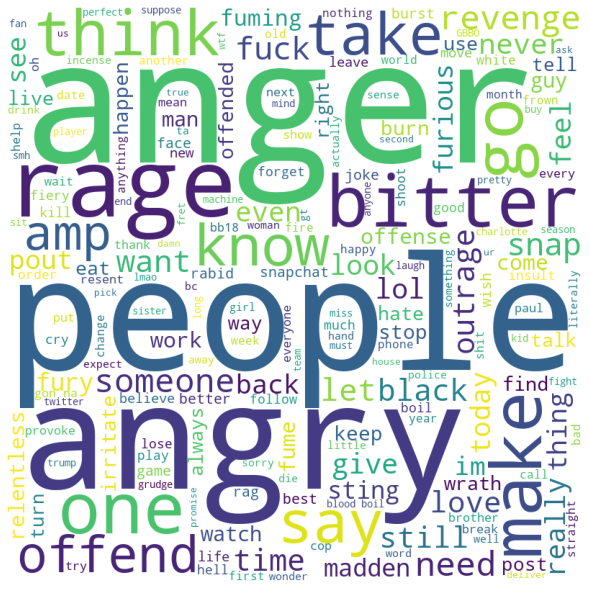

In [ ]:
comment_words = ''
for val in train_read['Cleaned Text']:
    comment_words += " ".join(val)+" "

for val in train_read['Hashtags']:
    comment_words += " ".join(val)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#Unique words in Train set
len(comment_words)
li = list(comment_words.split(" "))
x=np.array(li)
max_words=len(np.unique(x))

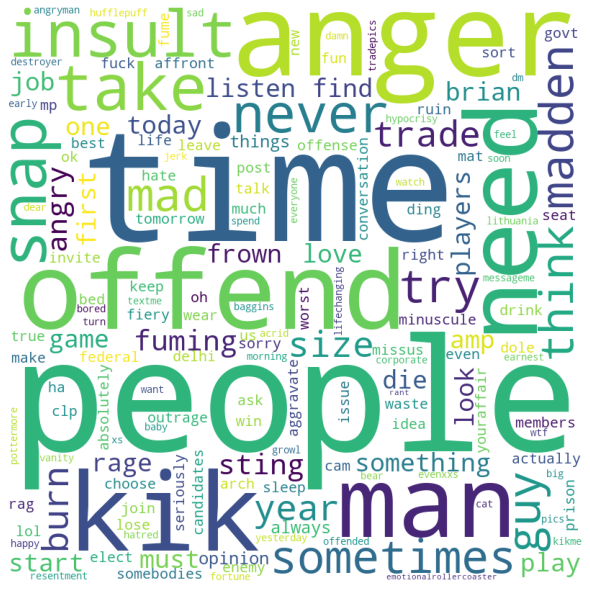

In [ ]:
comment_words = ''
for val in dev_read['Cleaned Text']:
    comment_words += " ".join(val)+" "

for val in dev_read['Hashtags']:
    comment_words += " ".join(val)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#Unique words in Dev set
len(comment_words)
li = list(comment_words.split(" "))
x=np.array(li)
len(np.unique(x))

463

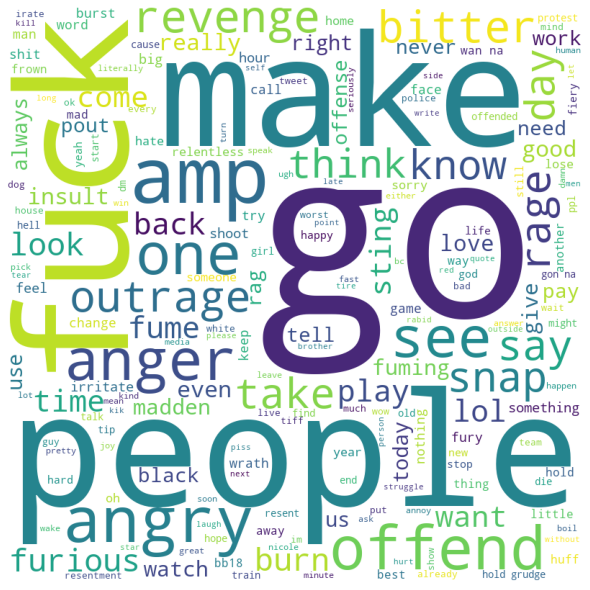

In [ ]:
comment_words = ''
for val in test_read['Cleaned Text']:
    comment_words += " ".join(val)+" "

for val in test_read['Hashtags']:
    comment_words += " ".join(val)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#Unique words in Test set
len(comment_words)
li = list(comment_words.split(" "))
x=np.array(li)
len(np.unique(x))

2366

# Text Pre-processing

In [ ]:
def join_sent(text):  
    str1 = " "
    return str1.join(text)

In [ ]:
train_read['Tweet text']=train_read['Cleaned Text']+train_read['Hashtags']

In [ ]:
dev_read['Tweet text']=dev_read['Cleaned Text']+dev_read['Hashtags']

In [ ]:
test_read['Tweet text']=test_read['Cleaned Text']+test_read['Hashtags']

In [ ]:
train_read['Sentences']=train_read['Tweet text'].apply(join_sent)

In [ ]:
train_read.head()

,Index,Tweet,Emotion,Emotion Intensity,Cleaned Text,Hashtags,Tweet text,Sentences
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,"[fu*k, heck, move, fridge, knock, landlord, door]","[angry, mad]","[fu*k, heck, move, fridge, knock, landlord, do...",fu*k heck move fridge knock landlord door angr...
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,"[indian, uber, driver, call, someone, n, word,...",[disgusted],"[indian, uber, driver, call, someone, n, word,...",indian uber driver call someone n word move ve...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,"[ask, parcel, deliver, pick, store, address]","[fuming, poorcustomerservice]","[ask, parcel, deliver, pick, store, address, f...",ask parcel deliver pick store address fuming p...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,"[ef, whichever, butt, wipe, pull, fire, alarm,...","[pissed, angry, upset, tired, sad, tired, hangry]","[ef, whichever, butt, wipe, pull, fire, alarm,...",ef whichever butt wipe pull fire alarm davis b...
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,"[join, put, phone, talk, rude, take, money, ac...",[fuming],"[join, put, phone, talk, rude, take, money, ac...",join put phone talk rude take money acc willyn...


In [ ]:
dev_read['Sentences']=dev_read['Tweet text'].apply(join_sent)

In [ ]:
test_read['Sentences']=test_read['Tweet text'].apply(join_sent)

In [ ]:
def max_len_sent():
  max=0
  for i in train_read['Tweet text']:
    if len(i)>max:
      max=len(i)
  return max

max_len_train=max_len_sent()
max_len_train

19

In [ ]:
def max_len_sent():
  max=0
  for i in dev_read['Tweet text']:
    if len(i)>max:
      max=len(i)
  return max

max_len_dev=max_len_sent()
max_len_dev

17

In [ ]:
def max_len_sent():
  max=0
  for i in test_read['Tweet text']:
    if len(i)>max:
      max=len(i)
  return max

max_len_test=max_len_sent()
max_len_test

20

In [ ]:
train_read_5 = train_read[train_read['Emotion Intensity'] > 0.5]

In [ ]:
dev_read_5 = dev_read[dev_read['Emotion Intensity'] > 0.5]

In [ ]:
#test_read_5 = test_read[test_read['Emotion Intensity'] > 0.5]

In [ ]:
data_to_list = train_read['Sentences'].values.tolist()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_to_list)
sequences = tokenizer.texts_to_sequences(data_to_list)
train_data = pad_sequences(sequences, maxlen=max_len_train)
print(train_data)

[[   0    0    0 ...  424    6  301]
 [   0    0    0 ...  611  303  612]
 [   0    0    0 ...  614   46  615]
 ...
 [   0    0    0 ...  113  113  421]
 [   0    0    0 ...   98 1001 1002]
 [   0    0    0 ... 1186   64   12]]


In [ ]:
data_to_list = dev_read['Sentences'].values.tolist()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_to_list)
sequences = tokenizer.texts_to_sequences(data_to_list)
dev_data = pad_sequences(sequences, maxlen=max_len_dev)
print(dev_data)

[[  0   0   0 ...  10 173 174]
 [  0   0   0 ...  49  50  13]
 [  0   0   0 ...  28  14 179]
 ...
 [  0   0   0 ... 454   7 455]
 [  0   0   0 ...  41 459 460]
 [  0   0   0 ... 111  25 462]]


In [ ]:
data_to_list = test_read['Sentences'].values.tolist()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_to_list)
sequences = tokenizer.texts_to_sequences(data_to_list)
test_data = pad_sequences(sequences, maxlen=max_len_test)
print(test_data)

[[   0    0    0 ... 1144   69  293]
 [   0    0    0 ...   48 1145   86]
 [   0    0    0 ...   29  162 1146]
 ...
 [   0    0    0 ... 2343   33   66]
 [   0    0    0 ...   33   66  353]
 [   0    0    0 ...   35  157  202]]


In [ ]:
y_train = train_read['Emotion Intensity'].to_numpy()
y_train=y_train.reshape(len(train_data),1)

In [ ]:
y_dev = dev_read['Emotion Intensity'].to_numpy()
y_dev=y_dev.reshape(len(dev_data),1)

In [ ]:
y_test = test_read['Emotion Intensity'].to_numpy()
y_test=y_test.reshape(len(test_data),1)

In [ ]:
data_to_list = train_read_5['Sentences'].values.tolist()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_to_list)
sequences = tokenizer.texts_to_sequences(data_to_list)
train_data_5 = pad_sequences(sequences, maxlen=max_len_train)
print(train_data_5)

[[   0    0    0 ...  285    2  125]
 [   0    0    0 ...  288  187  289]
 [   0    0    0 ...  291   11  292]
 ...
 [   0    0    0 ...  236 1369  383]
 [   0    0    0 ...  552 1370    5]
 [   0    0    0 ...  472  438 1376]]


In [ ]:
data_to_list = dev_read_5['Sentences'].values.tolist()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_to_list)
sequences = tokenizer.texts_to_sequences(data_to_list)
dev_data_5 = pad_sequences(sequences, maxlen=max_len_dev)
print(dev_data_5)

[[  0   0   0   0   0   0   0   0  59  60  61  62  63   3  64  65  66]
 [  0   4   1   5  16  17   6  18  19  20   2  21  10   2   1  22  23]
 [  4   1   5  16  17   6  18  19  20   2  21  10   2   1  22  23   7]
 [  0   0   0   0   0   0  67  68  24  69  25  26  70  71  72  11  73]
 [  0   0   0   0   0  74  75  76  77  78  79   8  80  81  82  83  12]
 [  0   0   0   0   0   0  84  85  13  86  87  13  88  89  90  91  92]
 [  0   0   0   0   0   0  93  94  95  96   3  97   3  98  99 100 101]
 [  0   0   0   0   0   0   0 102 103  27   3  28 104 105 106 107 108]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29  30 109 110]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24  31 111 112   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 113 114  29 115]
 [  0   0   0   0   0   0   0   0 116  27 117 118 119 120 121 122 123]
 [  0   0   0   0   0   0   0   0   0 124 125 126  30 127 128   8 129]
 [  0   0   0   0   0   0   0 130  31  32 131   2  33 132  34  35  13]
 [  0 

In [ ]:
#data_to_list = test_read_5['Sentences'].values.tolist()
#tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data_to_list)
#sequences = tokenizer.texts_to_sequences(data_to_list)
#test_data_5 = pad_sequences(sequences, maxlen=max_len_test)

In [ ]:
y_train_5 = train_read_5['Emotion Intensity'].to_numpy()
y_train_5=y_train_5.reshape(len(train_data_5),1)

In [ ]:
y_dev_5 = dev_read_5['Emotion Intensity'].to_numpy()
y_dev_5=y_dev_5.reshape(len(dev_data_5),1)

In [ ]:
#y_test_5 = test_read_5['Emotion Intensity'].to_numpy()
#y_test_5=y_test_5.reshape(len(test_data_5),1)

#Generate Embeddings

##Lexicons

In [ ]:
lexicon_dict=pd.read_csv("/content/gdrive/MyDrive/EmoInt/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",delimiter = "\t",header=None)

In [ ]:
lexicon_dict

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141535,zoom,negative,0
141536,zoom,positive,0
141537,zoom,sadness,0
141538,zoom,surprise,0


In [ ]:
lexiconDf = pd.DataFrame(columns=['Word','anger','fear','joy','sadness'])

In [ ]:
ind=0
coun=0
for i in lexicon_dict.index:
  if ind<len(lexicon_dict):
    lexiconDf.loc[coun,'Word'] =lexicon_dict.loc[lexicon_dict.index[ind]][0]
    lexiconDf.loc[coun,'anger']=lexicon_dict.loc[lexicon_dict.index[ind]][2]
    lexiconDf.loc[coun,'fear']=lexicon_dict.loc[lexicon_dict.index[ind+3]][2]
    lexiconDf.loc[coun,'joy']=lexicon_dict.loc[lexicon_dict.index[ind+4]][2]
    lexiconDf.loc[coun,'sadness']=lexicon_dict.loc[lexicon_dict.index[ind+7]][2]
  else:
    break
  ind += 10
  coun+=1

In [ ]:
lexiconDf

,Word,anger,fear,joy,sadness
0,aback,0,0,0,0
1,abacus,0,0,0,0
2,abandon,0,1,0,1
3,abandoned,1,1,0,1
4,abandonment,1,1,0,1
...,...,...,...,...,...
14149,zone,0,0,0,0
14150,zoo,0,0,0,0
14151,zoological,0,0,0,0
14152,zoology,0,0,0,0


In [ ]:
def lexicon_avg_train():
  val=[]
  for i in train_read['Tweet text']:
    avg=0
    count=0
    for j in i:
      count=count+1
      qs=lexiconDf[lexiconDf.eq(j).any(1)]
      if (qs.empty)==False:
        avg=avg+int(qs['anger'])
    avg=avg/count
    val.append(avg)
  return val

lexicon_train_set=lexicon_avg_train()

In [ ]:
def lexicon_avg_dev():
  val=[]
  for i in dev_read['Tweet text']:
    avg=0
    count=0
    for j in i:
      count=count+1
      qs=lexiconDf[lexiconDf.eq(j).any(1)]
      if (qs.empty)==False:
        avg=avg+int(qs['anger'])
    avg=avg/count
    val.append(avg)
  return val

lexicon_dev_set=lexicon_avg_dev()

In [ ]:
def lexicon_avg_test():
  val=[]
  for i in test_read['Tweet text']:
    avg=0
    count=0
    for j in i:
      count=count+1
      qs=lexiconDf[lexiconDf.eq(j).any(1)]
      if (qs.empty)==False:
        avg=avg+int(qs['anger'])
    avg=avg/count
    val.append(avg)
  return val

lexicon_test_set=lexicon_avg_test()

In [ ]:
textfile = open("/content/gdrive/MyDrive/EmoInt/anger/file1content.txt", "w")
for element in lexicon_train_set:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
textfile = open("/content/gdrive/MyDrive/EmoInt/anger/file2content.txt", "w")
for element in lexicon_dev_set:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
textfile = open("/content/gdrive/MyDrive/EmoInt/anger/file3content.txt", "w")
for element in lexicon_test_set:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
with open('/content/gdrive/MyDrive/EmoInt/anger/file1content.txt') as f:
    lexicon_train_set = f.read().splitlines()

for i in range(0, len(lexicon_train_set)):
    lexicon_train_set[i] = float(lexicon_train_set[i])

In [ ]:
with open('/content/gdrive/MyDrive/EmoInt/anger/file2content.txt') as f:
    lexicon_dev_set = f.read().splitlines()

for i in range(0, len(lexicon_dev_set)):
    lexicon_dev_set[i] = float(lexicon_dev_set[i])

In [ ]:
with open('/content/gdrive/MyDrive/EmoInt/anger/file3content.txt') as f:
    lexicon_test_set = f.read().splitlines()

for i in range(0, len(lexicon_test_set)):
    lexicon_test_set[i] = float(lexicon_test_set[i])

In [ ]:
Xarr1 = np.array(lexicon_train_set)
Xarr1=Xarr1.reshape(len(Xarr1),1)
yarr1 = train_read['Emotion Intensity'].to_numpy()
yarr1=yarr1.reshape(len(Xarr1),1)
lexicon_train=np.hstack((Xarr1,yarr1))

In [ ]:
Xarr2 = np.array(lexicon_dev_set)
Xarr2=Xarr2.reshape(len(Xarr2),1)
yarr2 = dev_read['Emotion Intensity'].to_numpy()
yarr2=yarr2.reshape(len(Xarr2),1)
lexicon_dev=np.hstack((Xarr2,yarr2))

In [ ]:
Xarr3 = np.array(lexicon_test_set)
Xarr3=Xarr3.reshape(len(Xarr3),1)
yarr3 = test_read['Emotion Intensity'].to_numpy()
yarr3=yarr3.reshape(len(Xarr3),1)
lexicon_test=np.hstack((Xarr3,yarr3))

In [ ]:
filter = lexicon_train[:,1]>0.5
lexicon_train_5=lexicon_train[filter]

In [ ]:
filter = lexicon_dev[:,1]>0.5
lexicon_dev_5=lexicon_dev[filter]

In [ ]:
#filter = lexicon_test[:,1]>0.5
#lexicon_test_5=lexicon_test[filter]

## Word2Vec

In [ ]:
from gensim.models import KeyedVectors
filename = '/content/gdrive/MyDrive/EmoInt/GoogleNews-vectors-negative300.bin'
wordmodel = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
pretrained_weights = wordmodel.wv.syn0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [ ]:
vocab_size, emdedding_size = pretrained_weights.shape

#Evaluation Metrics

In [ ]:
def evaluate(pred_scores,gold_scores,pred_scores_range_05_1,gold_scores_range_05_1):
  pears_corr=stats.pearsonr(pred_scores,gold_scores)[0]
  spear_corr=stats.spearmanr(pred_scores,gold_scores)[0]
  pears_corr_range_05_1=stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                    
  spear_corr_range_05_1=stats.spearmanr(pred_scores_range_05_1,gold_scores_range_05_1)[0]       
  return [pears_corr,spear_corr,pears_corr_range_05_1,spear_corr_range_05_1]

#Models

##Statistical Model

### SVM Regression 

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(lexicon_train[:,0].reshape(-1, 1), lexicon_train[:,1])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
y_pred=regr.predict(lexicon_dev[:,1].reshape(-1, 1))

In [ ]:
y_pred_5=regr.predict(lexicon_dev_5[:,1].reshape(-1, 1))

In [ ]:
[pears_corr1,spear_corr1,pears_corr_range_05_11,spear_corr_range_05_11]=evaluate(y_pred,lexicon_dev[:,1],y_pred_5,lexicon_dev_5[:,1])
print('Pearsons correlation for gold score:'+str(pears_corr1))
print('Spearmans correlation for gold score:'+str(spear_corr1))
print('Pearsons correlation for gold score for gold score greater than 0.5:'+str(pears_corr_range_05_11))
print('Spearmans correlation for gold score for gold score greater than 0.5:'+str(spear_corr_range_05_11))

Pearsons correlation for gold score:0.18044577088421648
Spearmans correlation for gold score:0.42014452744397535
Pearsons correlation for gold score for gold score greater than 0.5:-0.7870357383865021
Spearmans correlation for gold score for gold score greater than 0.5:-0.49104246014952735


### Linear Regression

In [ ]:
reg = LinearRegression().fit(lexicon_train[:,0].reshape(-1, 1), lexicon_train[:,1])

In [ ]:
reg.score(lexicon_train[:,0].reshape(-1, 1), lexicon_train[:,1])

0.019391204527543948

In [ ]:
m=reg.coef_
m

array([0.16887602])

In [ ]:
b=reg.intercept_
b

0.47546575902865906

In [ ]:
y_pred=reg.predict(lexicon_dev[:,1].reshape(-1, 1))

In [ ]:
y_pred_5=reg.predict(lexicon_dev_5[:,1].reshape(-1, 1))

In [ ]:
[pears_corr2,spear_corr2,pears_corr_range_05_12,spear_corr_range_05_12]=evaluate(y_pred,lexicon_dev[:,1],y_pred_5,lexicon_dev_5[:,1])
print('Pearsons correlation for gold score:'+str(pears_corr2))
print('Spearmans correlation for gold score:'+str(spear_corr2))
print('Pearsons correlation for gold score for gold score greater than 0.5:'+str(pears_corr_range_05_12))
print('Spearmans correlation for gold score for gold score greater than 0.5:'+str(spear_corr_range_05_12))

Pearsons correlation for gold score:1.0
Spearmans correlation for gold score:1.0
Pearsons correlation for gold score for gold score greater than 0.5:1.0
Spearmans correlation for gold score for gold score greater than 0.5:0.9999999999999998


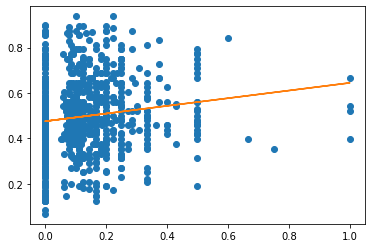

In [ ]:
plt.plot(lexicon_train[:,0], lexicon_train[:,1], 'o')
plt.plot(lexicon_train[:,0], m*lexicon_train[:,0] + b)
plt.show()

## Deep Learning Models

### LSTM

In [ ]:
model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, output_dim=emdedding_size,weights=[pretrained_weights]))
model1.add(layers.LSTM(15,dropout=0.5)) #Our LSTM layer
model1.add(layers.Dense(3,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [ ]:
history = model1.fit(train_data, y_train, epochs=4,validation_data=(dev_data,y_dev))

Epoch 1/4
27/27 [==============================] - 213s 8s/step - loss: 0.0851 - val_loss: 0.0455
Epoch 2/4
27/27 [==============================] - 221s 8s/step - loss: 0.0322 - val_loss: 0.0278
Epoch 3/4
27/27 [==============================] - 258s 9s/step - loss: 0.0243 - val_loss: 0.0285
Epoch 4/4
27/27 [==============================] - 230s 8s/step - loss: 0.0184 - val_loss: 0.0287


In [ ]:
model1.save("/content/gdrive/MyDrive/EmoInt/anger/lstm_model")

In [ ]:
model1 = keras.models.load_model('/content/gdrive/MyDrive/EmoInt/anger/lstm_model')

In [ ]:
y_pred = model1.predict(dev_data)

In [ ]:
y_pred_5 = model1.predict(dev_data_5)

In [ ]:
y_dev_5 = np.array(y_dev_5, dtype = float)

In [ ]:
y_pred=y_pred[:,0].reshape(dev_data.shape[0],1)
y_pred_5=y_pred_5[:,0].reshape(dev_data_5.shape[0],1)
y_pred = np.squeeze(y_pred)
y_dev = np.squeeze(y_dev)
y_pred_5 = np.squeeze(y_pred_5)
y_dev_5 = np.squeeze(y_dev_5)

In [ ]:
[pears_corr3,spear_corr3,pears_corr_range_05_13,spear_corr_range_05_13]=evaluate(y_pred,y_dev,y_pred_5,y_dev_5)
print('Pearsons correlation for gold score:'+str(pears_corr3))
print('Spearmans correlation for gold score:'+str(spear_corr3))
print('Pearsons correlation for gold score for gold score greater than 0.5:'+str(pears_corr_range_05_13))
print('Spearmans correlation for gold score for gold score greater than 0.5:'+str(spear_corr_range_05_13))

Pearsons correlation for gold score:0.07655237244665085
Spearmans correlation for gold score:0.09183623429421335
Pearsons correlation for gold score for gold score greater than 0.5:-0.1239240263206737
Spearmans correlation for gold score for gold score greater than 0.5:-0.0726689607005455


### Bidirectional LSTM

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, output_dim=emdedding_size,weights=[pretrained_weights]))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='relu'))
model2.compile(optimizer='adam',loss='mse',)

In [ ]:
history2 = model2.fit(train_data, y_train, epochs=5,validation_data=(dev_data,y_dev))

Epoch 1/5
27/27 [==============================] - 205s 8s/step - loss: 0.0829 - val_loss: 0.0276
Epoch 2/5
27/27 [==============================] - 224s 8s/step - loss: 0.0310 - val_loss: 0.0282
Epoch 3/5
27/27 [==============================] - 255s 9s/step - loss: 0.0243 - val_loss: 0.0290
Epoch 4/5
27/27 [==============================] - 249s 9s/step - loss: 0.0202 - val_loss: 0.0286
Epoch 5/5
27/27 [==============================] - 230s 9s/step - loss: 0.0162 - val_loss: 0.0315


In [ ]:
model2.save("/content/gdrive/MyDrive/EmoInt/anger/bidirectional_lstm_model")

In [ ]:
model2 = keras.models.load_model('/content/gdrive/MyDrive/EmoInt/anger/bidirectional_lstm_model')

In [ ]:
y_pred = model2.predict(dev_data)

In [ ]:
y_pred_5 = model2.predict(dev_data_5)

In [ ]:
y_pred=y_pred[:,0].reshape(dev_data.shape[0],1)
y_pred_5=y_pred_5[:,0].reshape(dev_data_5.shape[0],1)
y_pred = np.squeeze(y_pred)
y_dev = np.squeeze(y_dev)
y_pred_5 = np.squeeze(y_pred_5)
y_dev_5 = np.squeeze(y_dev_5)

In [ ]:
[pears_corr4,spear_corr4,pears_corr_range_05_14,spear_corr_range_05_14]=evaluate(y_pred,y_dev,y_pred_5,y_dev_5)
print('Pearsons correlation for gold score:'+str(pears_corr4))
print('Spearmans correlation for gold score:'+str(spear_corr4))
print('Pearsons correlation for gold score for gold score greater than 0.5:'+str(pears_corr_range_05_14))
print('Spearmans correlation for gold score for gold score greater than 0.5:'+str(spear_corr_range_05_14))

Pearsons correlation for gold score:0.13587225795428934
Spearmans correlation for gold score:0.1575341905236738
Pearsons correlation for gold score for gold score greater than 0.5:-0.1805759994706594
Spearmans correlation for gold score for gold score greater than 0.5:-0.18202379904682095


###1-D Conv Net

In [ ]:
model3 = Sequential()
model3.add(layers.Embedding(input_dim=vocab_size, output_dim=emdedding_size,weights=[pretrained_weights]))
model3.add(layers.Conv1D(filters=32, kernel_size=8, activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=2))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(1, activation='relu'))
model3.compile(optimizer='adam',loss='mse')

In [ ]:
history3 = model3.fit(train_data, y_train, epochs=5,validation_data=(dev_data,y_dev))

Epoch 1/5
27/27 [==============================] - 204s 7s/step - loss: 0.0521 - val_loss: 0.0331
Epoch 2/5
27/27 [==============================] - 202s 8s/step - loss: 0.0411 - val_loss: 0.0345
Epoch 3/5
27/27 [==============================] - 209s 8s/step - loss: 0.0297 - val_loss: 0.0338
Epoch 4/5
27/27 [==============================] - 199s 7s/step - loss: 0.0166 - val_loss: 0.0332
Epoch 5/5
27/27 [==============================] - 216s 8s/step - loss: 0.0111 - val_loss: 0.0307


In [ ]:
model3.save("/content/gdrive/MyDrive/EmoInt/anger/1ConvNet_model")

In [ ]:
model3 = keras.models.load_model('/content/gdrive/MyDrive/EmoInt/anger/1ConvNet_model')

In [ ]:
y_pred = model3.predict(dev_data)

In [ ]:
y_pred_5 = model3.predict(dev_data_5)

In [ ]:
y_pred=y_pred[:,0].reshape(dev_data.shape[0],1)
y_pred_5=y_pred_5[:,0].reshape(dev_data_5.shape[0],1)
y_pred = np.squeeze(y_pred)
y_dev = np.squeeze(y_dev)
y_pred_5 = np.squeeze(y_pred_5)
y_dev_5 = np.squeeze(y_dev_5)

In [ ]:
[pears_corr5,spear_corr5,pears_corr_range_05_15,spear_corr_range_05_15]=evaluate(y_pred,y_dev,y_pred_5,y_dev_5)
print('Pearsons correlation for gold score:'+str(pears_corr5))
print('Spearmans correlation for gold score:'+str(spear_corr5))
print('Pearsons correlation for gold score for gold score greater than 0.5:'+str(pears_corr_range_05_15))
print('Spearmans correlation for gold score for gold score greater than 0.5:'+str(spear_corr_range_05_15))

Pearsons correlation for gold score:0.1822758986789404
Spearmans correlation for gold score:0.23367326616624085
Pearsons correlation for gold score for gold score greater than 0.5:-0.25039490238726514
Spearmans correlation for gold score for gold score greater than 0.5:-0.19130068764689062
